<a href="https://colab.research.google.com/github/jerrymart/Machine-Learning-Projects/blob/main/Project1_HR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Team Members:

Joseph Mart (Project Lead)- A00732897

Callitus Obunadike - A00756855

In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


%matplotlib inline

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

import warnings
warnings.filterwarnings('ignore')

In [3]:
df0 = pd.read_csv('/content/HR_comma_sep.csv')

In [ ]:
df0.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157.0,3,0,1,0,sales,low


In [ ]:
# print the shape
print(df0.shape)

(14999, 10)


In [ ]:
# Checking for null values

df0.isnull().sum()

satisfaction_level       2
last_evaluation          0
number_project           0
average_montly_hours     1
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [ ]:
# Visualize the NULL observations

df0[df0['satisfaction_level'].isnull()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
18,NaN,0.51,2,160.0,3,1,1,1,sales,low
23,NaN,0.57,2,139.0,3,0,1,0,sales,low


##### EDA (a) :Replace 'NA'

In [ ]:
df0 = df0.fillna(df0.mean())
df0

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157.0,3,0,1,0,sales,low
1,0.80,0.86,5,262.0,6,0,1,0,sales,medium
2,0.11,0.88,7,272.0,4,0,1,0,sales,medium
3,0.72,0.87,5,223.0,5,0,1,0,sales,low
4,0.37,0.52,2,159.0,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151.0,3,0,1,0,support,low
14995,0.37,0.48,2,160.0,3,0,1,0,support,low
14996,0.37,0.53,2,143.0,3,0,1,0,support,low
14997,0.11,0.96,6,280.0,4,0,1,0,support,low


In [ ]:
#Check that NA are no more present
df0.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

##### EDA (a):  Change Categorical Salary to Ordinal

In [ ]:
# Creating Scale Map
scale_mapper = {'low':1, 'medium':2, 'high':3}

# Map feature values to scale
df0['salary'] = df0['salary'].replace(scale_mapper)

In [ ]:
df0['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [ ]:
# Creating Scale Map
scale_mapper2 = {'sales':1, 'accounting':2, 'hr':3, 'technical':4, 'support':5, 'management':6, 'IT':7,
                 'product_mng':8, 'marketing':9, 'RandD':10}

# Map feature values to scale
df0['sales'] = df0['sales'].replace(scale_mapper2)

In [ ]:
#Check the dataframe
#salary and sales is changed to ordinal

df0.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157.0,3,0,1,0,1,1
1,0.80,0.86,5,262.0,6,0,1,0,1,2
2,0.11,0.88,7,272.0,4,0,1,0,1,2
3,0.72,0.87,5,223.0,5,0,1,0,1,1
4,0.37,0.52,2,159.0,3,0,1,0,1,1


In [ ]:
df0['salary'].nunique()

3

#### EDA(b)

In [ ]:
#Checking for Unbalanced classification in the target variable

df0['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

There is umbalncesness in the target

This would be handled

In [ ]:
#dfnew.nunique()

In [ ]:
# Investigate all the elements whithin each Feature 

for column in df0:
    unique_values = np.unique(df0[column])
    number_of_values = len(unique_values)
    if number_of_values <= 10:
        print("The number of values for feature {} is: {} -- {}".format(column, number_of_values, unique_values))
    else:
        print("The number of values for feature {} is: {}".format(column, number_of_values))

The number of values for feature satisfaction_level is: 93
The number of values for feature last_evaluation is: 65
The number of values for feature number_project is: 6 -- [2 3 4 5 6 7]
The number of values for feature average_montly_hours is: 216
The number of values for feature time_spend_company is: 8 -- [ 2  3  4  5  6  7  8 10]
The number of values for feature Work_accident is: 2 -- [0 1]
The number of values for feature left is: 2 -- [0 1]
The number of values for feature promotion_last_5years is: 2 -- [0 1]
The number of values for feature sales is: 10 -- [ 1  2  3  4  5  6  7  8  9 10]
The number of values for feature salary is: 3 -- [1 2 3]


##### EDA 1c

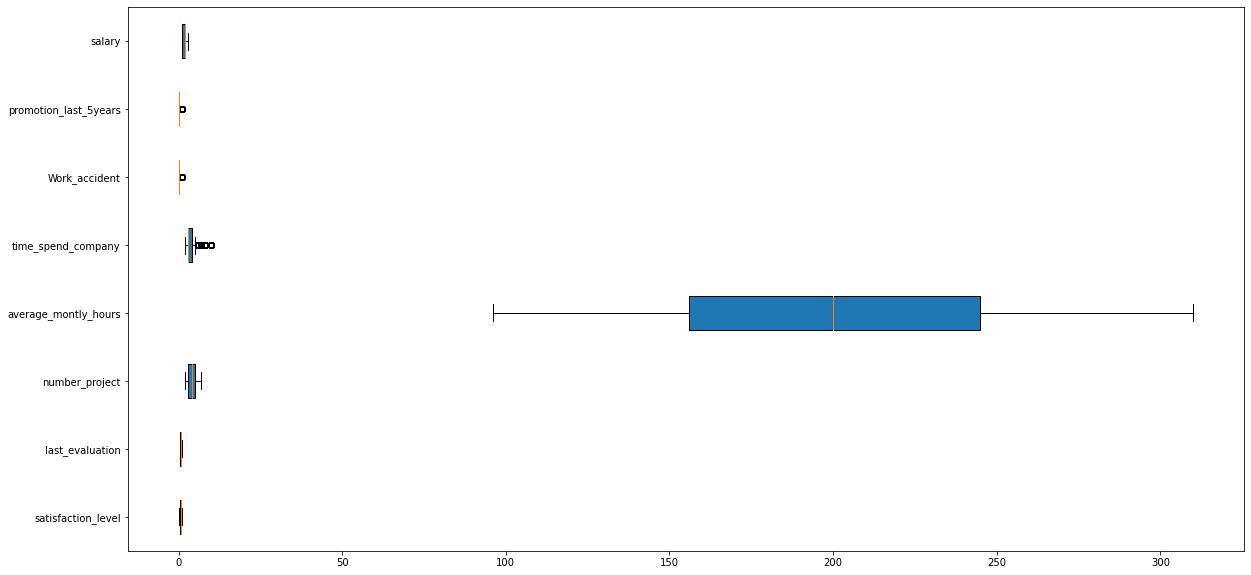

In [ ]:
#set the plot size
plt.figure(figsize=(20,10))

label=['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 
        'time_spend_company', 'Work_accident', 'promotion_last_5years', 'salary'
      ]

box_plot_data=df0[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 
                   'time_spend_company', 'Work_accident', 'promotion_last_5years', 'salary'
                 ]]

plt.boxplot(box_plot_data,vert=0, patch_artist=True,labels=label)
plt.show()

#### Individual Box Plot

count    14999.000000
mean         0.612855
std          0.248624
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

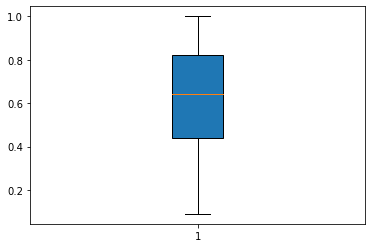

In [ ]:
plt.boxplot(df0['satisfaction_level'],patch_artist=True)

#Five Number Summary
df0['satisfaction_level'].describe()

count    14999.000000
mean         0.716102
std          0.171169
min          0.360000
25%          0.560000
50%          0.720000
75%          0.870000
max          1.000000
Name: last_evaluation, dtype: float64

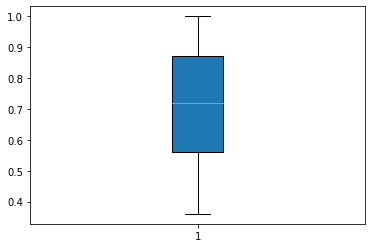

In [ ]:
plt.boxplot(df0['last_evaluation'],patch_artist=True)

#Five Number Summary
df0['last_evaluation'].describe()


count    14999.000000
mean         3.803054
std          1.232592
min          2.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: number_project, dtype: float64

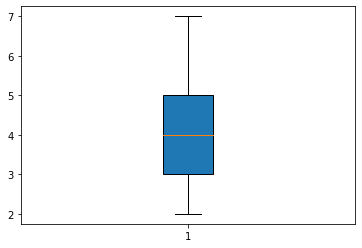

In [ ]:
plt.boxplot(df0['number_project'],patch_artist=True)

#Five Number Summary
df0['number_project'].describe()

count    14999.000000
mean       201.046273
std         49.940619
min         96.000000
25%        156.000000
50%        200.000000
75%        245.000000
max        310.000000
Name: average_montly_hours, dtype: float64

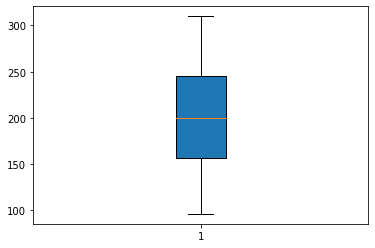

In [ ]:
plt.boxplot(df0['average_montly_hours'],patch_artist=True)

#Five Number Summary
df0['average_montly_hours'].describe()

count    14999.000000
mean         3.498233
std          1.460136
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: time_spend_company, dtype: float64

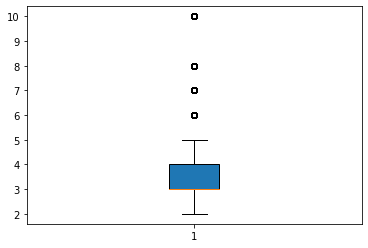

In [ ]:
plt.boxplot(df0['time_spend_company'],patch_artist=True)

#Five Number Summary
df0['time_spend_company'].describe()

count    14999.000000
mean         0.144610
std          0.351719
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Work_accident, dtype: float64

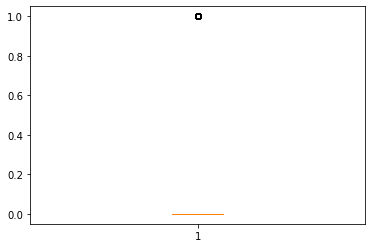

In [ ]:
plt.boxplot(df0['Work_accident'], patch_artist=True)

#Five Number Summary
df0['Work_accident'].describe()

count    14999.000000
mean         0.021268
std          0.144281
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: promotion_last_5years, dtype: float64

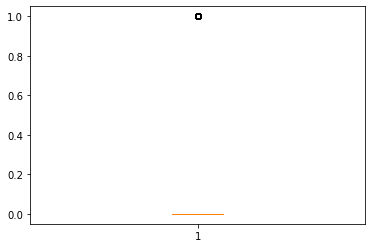

In [ ]:
plt.boxplot(df0['promotion_last_5years'], patch_artist=True)

#Five Number Summary
df0['promotion_last_5years'].describe()

count    14999.000000
mean         1.594706
std          0.637183
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: salary, dtype: float64

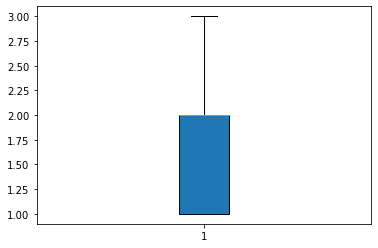

In [ ]:
#Salary
plt.boxplot(df0['salary'], patch_artist=True)

#Five Number Summary
df0['salary'].describe()

##### EDA: 1d

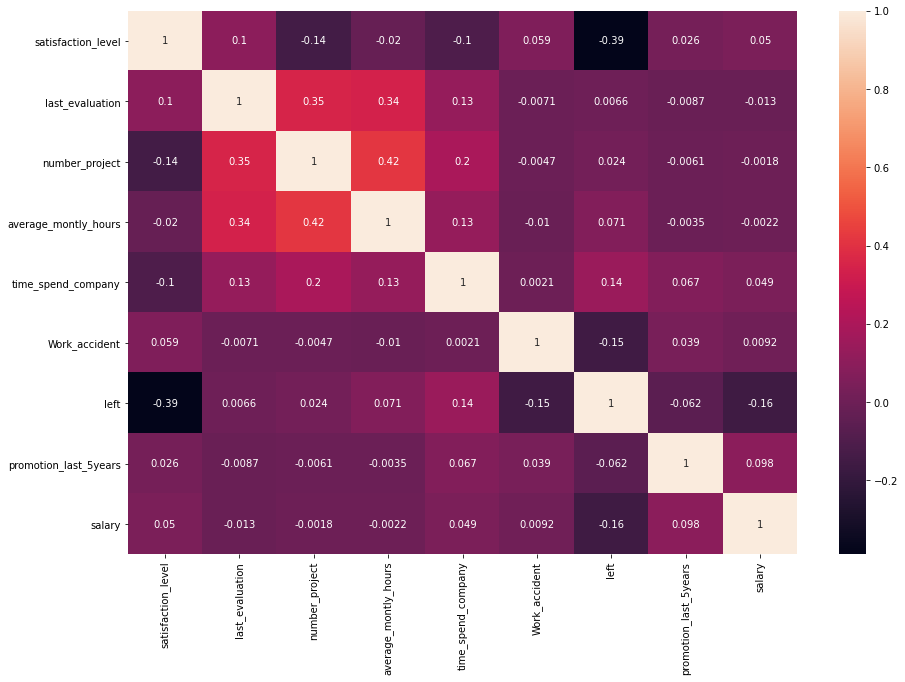

In [ ]:
#Correlation matrix
plt.figure(figsize=(15,10)) #Set figure size

sns.heatmap(df0.corr(), annot=True)

plt.show()

##### EDA: 1e

<AxesSubplot:xlabel='left', ylabel='salary'>

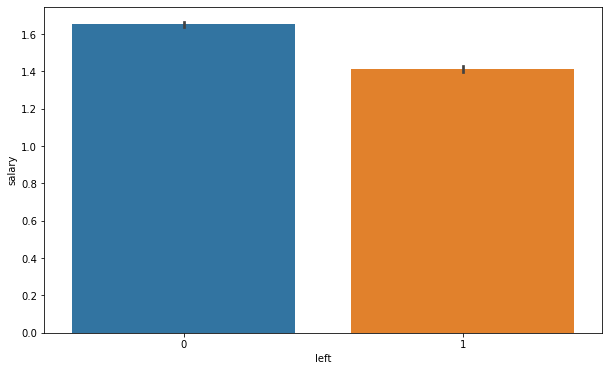

In [ ]:
##Using BoxPlot to know the effect of salary on employees retention

plt.figure(figsize=(10,6))

sns.barplot(x="left", y="salary", data=df0)

<AxesSubplot:xlabel='left', ylabel='count'>

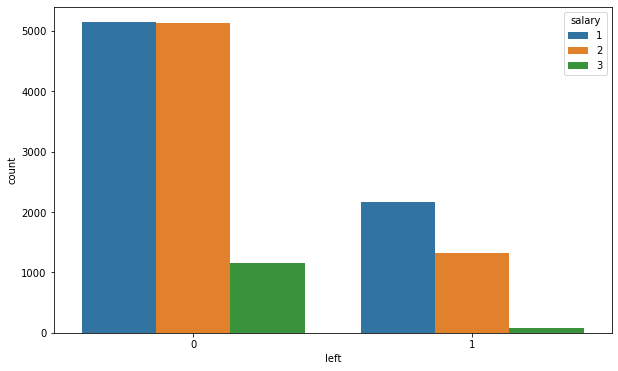

In [ ]:
#Using Count Plot to know the effect of salary on employees retention
plt.figure(figsize=(10,6))

sns.countplot(df0['left'], hue=df0['salary'])

#### EDA: f

##### Histogram plots for continuos features

<AxesSubplot:xlabel='satisfaction_level', ylabel='Count'>

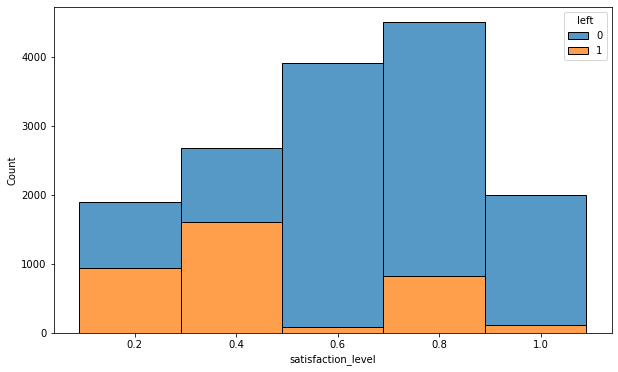

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df0,x='satisfaction_level',hue='left', binwidth = 0.2, multiple="stack")

<AxesSubplot:xlabel='last_evaluation', ylabel='Count'>

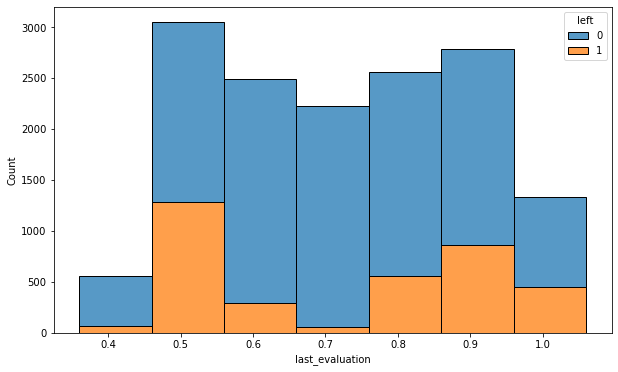

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df0,x='last_evaluation',hue='left', binwidth = 0.1, multiple="stack")

<AxesSubplot:xlabel='average_montly_hours', ylabel='Count'>

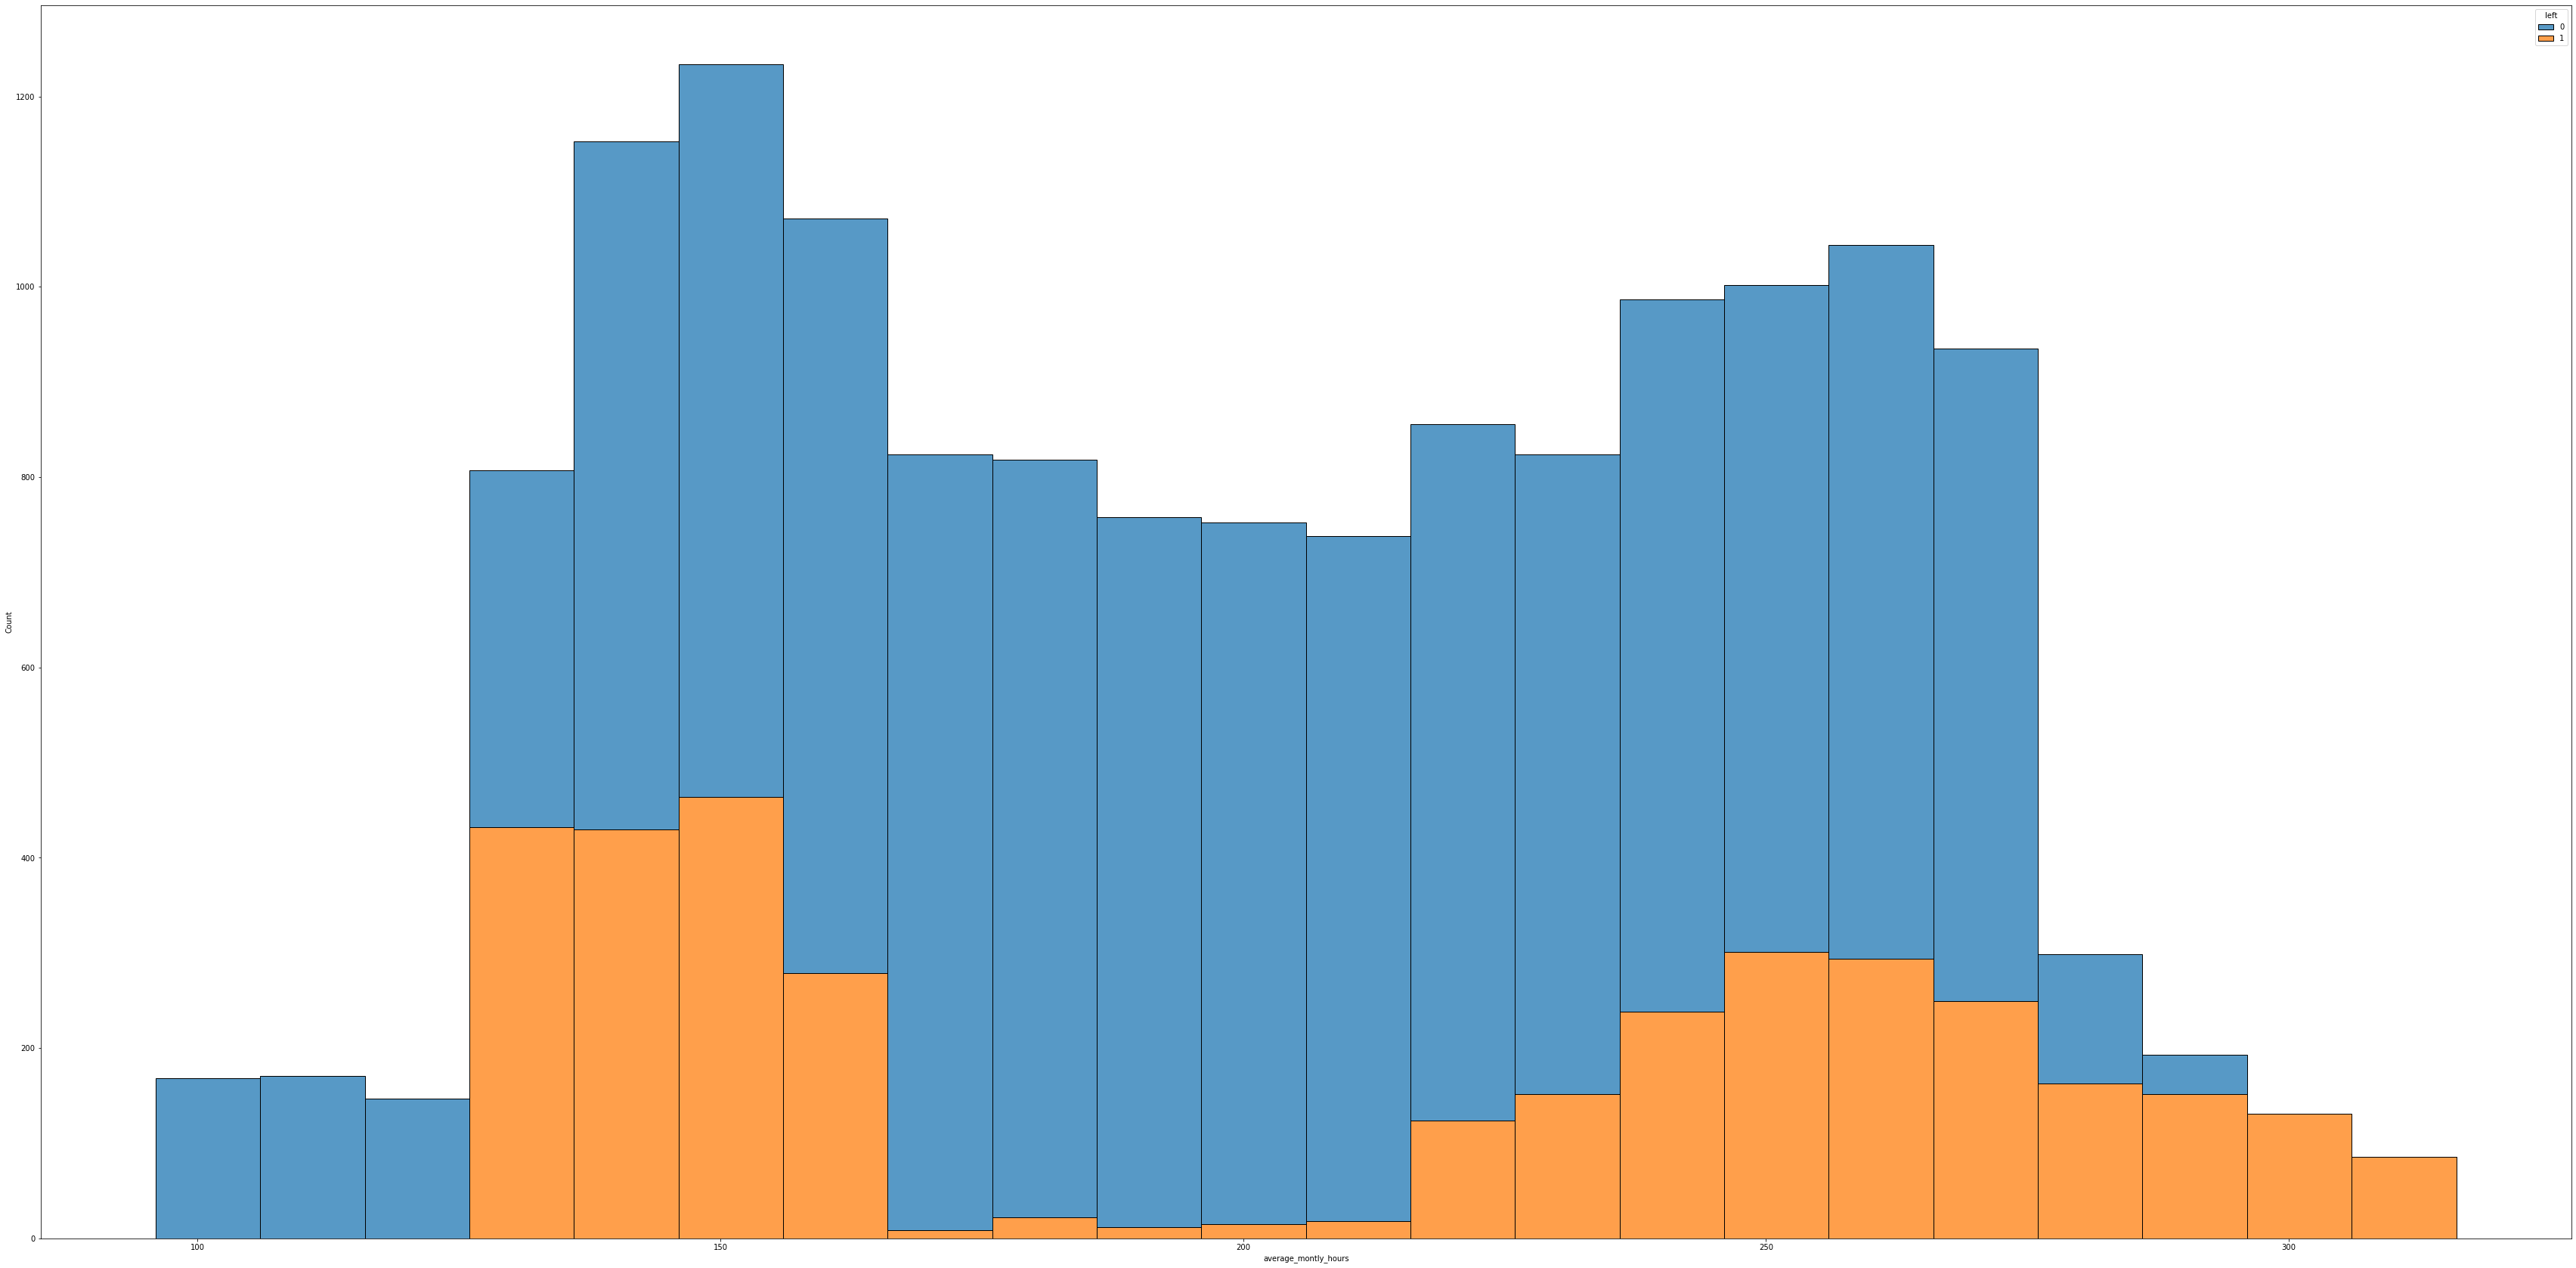

In [ ]:
plt.figure(figsize=(60,30))
sns.histplot(data=df0,x='average_montly_hours', binwidth = 10, hue='left', multiple="stack")

<AxesSubplot:xlabel='time_spend_company', ylabel='Count'>

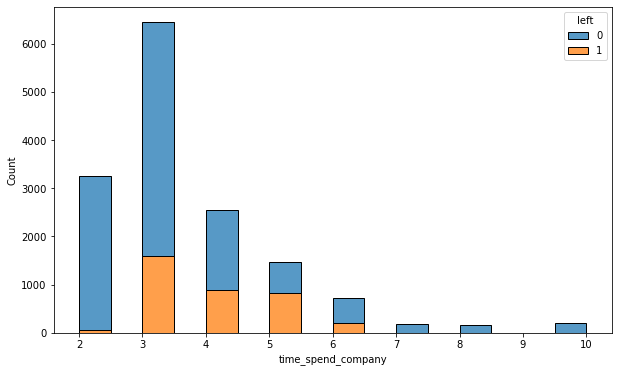

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df0,x='time_spend_company',hue='left',binwidth=0.5,multiple="stack")

### Histogram/countplot for categorical features seenas  follows

<AxesSubplot:xlabel='number_project', ylabel='Count'>

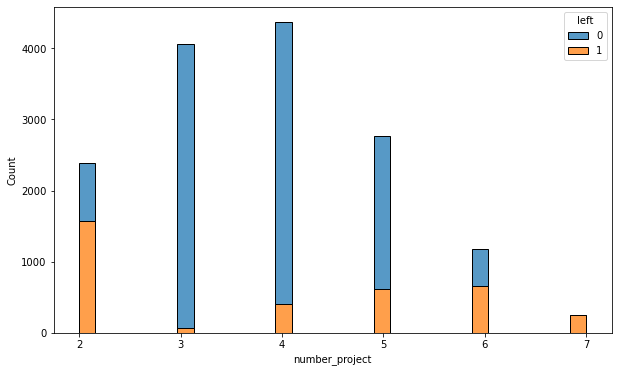

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df0,x='number_project',hue='left',multiple="stack")

<AxesSubplot:xlabel='number_project', ylabel='count'>

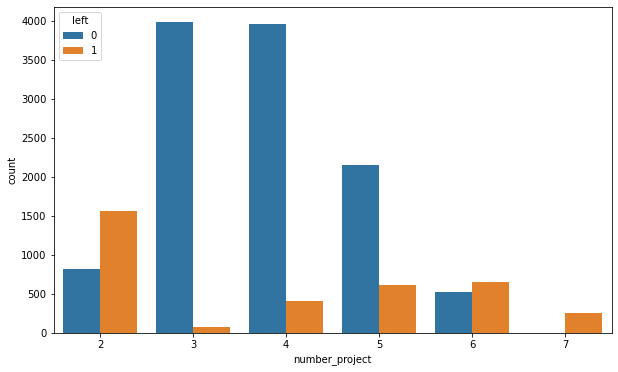

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df0,x='number_project',hue='left')

<AxesSubplot:xlabel='Work_accident', ylabel='Count'>

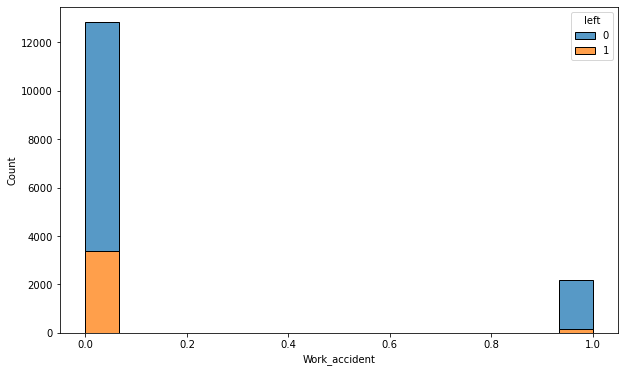

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df0,x='Work_accident',hue='left',multiple="stack")

<AxesSubplot:xlabel='Work_accident', ylabel='count'>

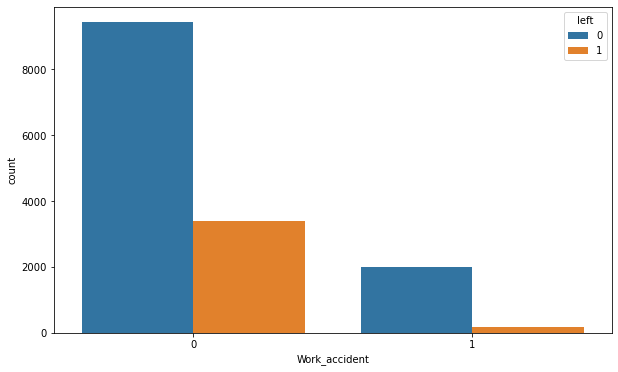

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df0,x='Work_accident',hue='left')

<AxesSubplot:xlabel='promotion_last_5years', ylabel='Count'>

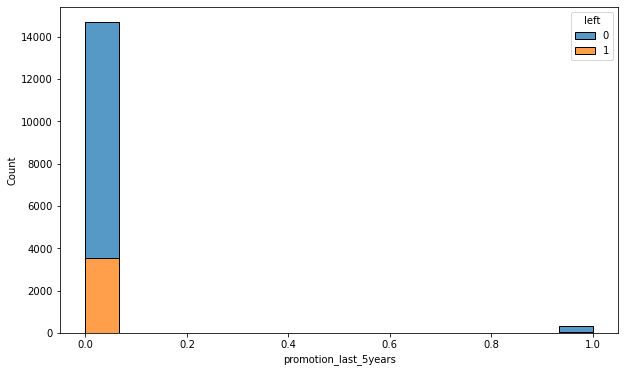

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df0,x='promotion_last_5years',hue='left',multiple="stack")

<AxesSubplot:xlabel='promotion_last_5years', ylabel='count'>

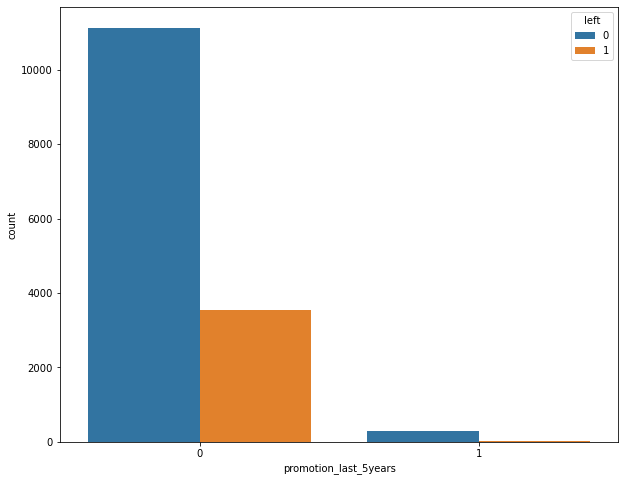

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data=df0,x='promotion_last_5years', hue='left')

<AxesSubplot:xlabel='salary', ylabel='Count'>

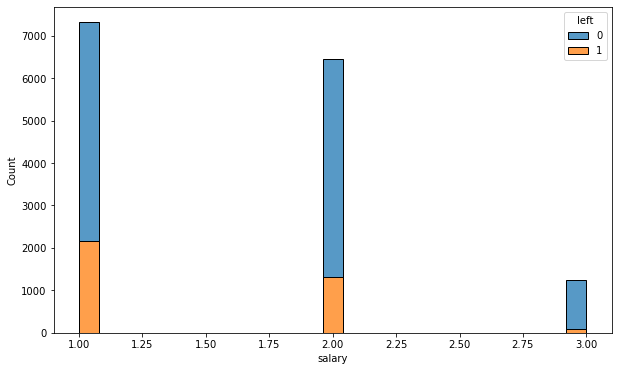

In [ ]:
plt.figure(figsize=(10,6))

sns.histplot(data=df0,x='salary',hue='left',multiple="stack")

<AxesSubplot:xlabel='salary', ylabel='count'>

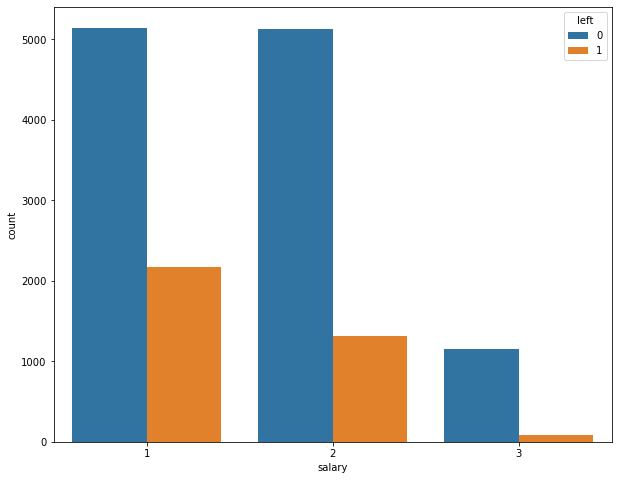

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data=df0,x='salary', hue='left')

<AxesSubplot:xlabel='sales', ylabel='count'>

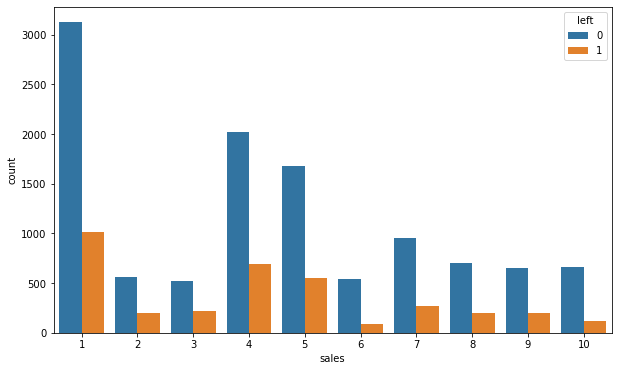

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df0,x='sales',hue='left')

In [ ]:
df0['sales'].value_counts()

1     4140
4     2720
5     2229
7     1227
8      902
9      858
10     787
2      767
3      739
6      630
Name: sales, dtype: int64

# 2. Variable Screening:

In [ ]:
df0.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157.0,3,0,1,0,sales,1
1,0.80,0.86,5,262.0,6,0,1,0,sales,2


# 2a. Wilcoxon rank-sum test.

In [ ]:
import scipy.stats as stats

In [ ]:
stats.mannwhitneyu(x= df0['satisfaction_level'], y = df0['left'])

MannwhitneyuResult(statistic=53363238.5, pvalue=0.0)

##### We can reject the null hypothesis that 'satisfaction_level'  have no relationship to the response variable

In [ ]:
stats.mannwhitneyu(x = df0['last_evaluation'], y = df0['left'])

MannwhitneyuResult(statistic=53056132.5, pvalue=0.0)

###### We can reject the null hypothesis that 'last_evaluation' have no relationship to the response variable

In [ ]:
stats.mannwhitneyu(x = df0['average_montly_hours'], y = df0['left'])

MannwhitneyuResult(statistic=0.0, pvalue=0.0)

##### We can reject the null hypothesis that 'average_montly_hours'  have no relationship to the response variable

# 2b. Chi-Square: X^2

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
#Work_accident - left
crosstab = pd.crosstab(df0['Work_accident'], df0['left'])
crosstab

left,0,1
Work_accident,,
0,9428,3402
1,2000,169


In [ ]:
stats.chi2_contingency(crosstab)

(357.5623604097228,
 9.55823958002199e-80,
 1,
 array([[9775.401027, 3054.598973],
        [1652.598973, 516.401027]]))

In [ ]:
#promotion_last_5years - left
crosstab2 = pd.crosstab(df0['promotion_last_5years'], df0['left'])
stats.chi2_contingency(crosstab2)

(56.26162726484021,
 6.344155457918697e-14,
 1,
 array([[11184.948330, 3495.051670],
        [243.051670, 75.948330]]))

In [ ]:
# salary - left
crosstab3 = pd.crosstab(df0['salary'], df0['left'])
stats.chi2_contingency(crosstab3)

(381.22504706621066,
 1.652086749295958e-83,
 2,
 array([[5574.188146, 1741.811854],
        [4911.319955, 1534.680045],
        [942.491899, 294.508101]]))

In [ ]:
# number_project - left
crosstab4 = pd.crosstab(df0['number_project'], df0['left'])
stats.chi2_contingency(crosstab4)

(5373.586480049047,
 0.0,
 5,
 array([[1819.458897, 568.541103],
        [3089.575305, 965.424695],
        [3325.769718, 1039.230282],
        [2103.654110, 657.345890],
        [894.491099, 279.508901],
        [195.050870, 60.949130]]))

# 3. Data partition:

In [ ]:
# Split the data into X & y

X = df0.drop(columns= ['left']).values
X

array([[0.380000, 0.530000, 2.000000, ..., 0.000000, 1.000000, 1.000000],
       [0.800000, 0.860000, 5.000000, ..., 0.000000, 1.000000, 2.000000],
       [0.110000, 0.880000, 7.000000, ..., 0.000000, 1.000000, 2.000000],
       ...,
       [0.370000, 0.530000, 2.000000, ..., 0.000000, 5.000000, 1.000000],
       [0.110000, 0.960000, 6.000000, ..., 0.000000, 5.000000, 1.000000],
       [0.370000, 0.520000, 2.000000, ..., 0.000000, 5.000000, 1.000000]])

In [ ]:
y = df0['left']
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.6, test_size=0.3, random_state=15)

In [ ]:
X_train[0:6, : ]

array([[0.720000, 0.910000, 3.000000, 239.000000, 2.000000, 0.000000,
        0.000000, 6.000000, 2.000000],
       [0.940000, 0.590000, 4.000000, 241.000000, 2.000000, 0.000000,
        0.000000, 4.000000, 1.000000],
       [0.410000, 0.530000, 2.000000, 157.000000, 3.000000, 0.000000,
        0.000000, 1.000000, 1.000000],
       [0.930000, 0.700000, 5.000000, 206.000000, 4.000000, 0.000000,
        0.000000, 2.000000, 1.000000],
       [0.750000, 0.680000, 4.000000, 220.000000, 2.000000, 0.000000,
        0.000000, 7.000000, 2.000000],
       [0.780000, 0.980000, 5.000000, 263.000000, 6.000000, 0.000000,
        0.000000, 1.000000, 1.000000]])

In [ ]:
y_train.head(5)

3722     0
10882    0
1997     1
6184     0
3346     0
Name: left, dtype: int64

In [ ]:
X_train.shape

(8999, 9)

In [ ]:
X_train[8994:8999, :]

array([[0.880000, 0.880000, 5.000000, 232.000000, 5.000000, 1.000000,
        0.000000, 2.000000, 2.000000],
       [0.990000, 0.980000, 5.000000, 241.000000, 2.000000, 0.000000,
        0.000000, 7.000000, 2.000000],
       [0.800000, 0.750000, 4.000000, 224.000000, 3.000000, 0.000000,
        1.000000, 1.000000, 2.000000],
       [0.420000, 0.490000, 2.000000, 139.000000, 3.000000, 0.000000,
        0.000000, 3.000000, 1.000000],
       [0.360000, 0.500000, 2.000000, 132.000000, 3.000000, 0.000000,
        0.000000, 6.000000, 1.000000]])

##### Alternatively

In [ ]:
print( (len(X_train[:,:])), (len(X_train[:,:])-5))

8999 8994


In [ ]:
X_train[ (len(X_train[:,:])-5):(len(X_train[:,:])), : ]

array([[0.880000, 0.880000, 5.000000, 232.000000, 5.000000, 1.000000,
        0.000000, 2.000000, 2.000000],
       [0.990000, 0.980000, 5.000000, 241.000000, 2.000000, 0.000000,
        0.000000, 7.000000, 2.000000],
       [0.800000, 0.750000, 4.000000, 224.000000, 3.000000, 0.000000,
        1.000000, 1.000000, 2.000000],
       [0.420000, 0.490000, 2.000000, 139.000000, 3.000000, 0.000000,
        0.000000, 3.000000, 1.000000],
       [0.360000, 0.500000, 2.000000, 132.000000, 3.000000, 0.000000,
        0.000000, 6.000000, 1.000000]])

In [ ]:
y_train.tail(5)

258      1
8696     0
13397    0
720      1
746      1
Name: left, dtype: int64

# PART B